In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [2]:
# Loading the Data
# Reference : https://arxiv.org/pdf/1704.06756.pdf
# https://medium.com/@rajath95/how-to-save-and-upload-deep-learning-machine-learning-models-in-google-colab-using-google-drive-eb2901937ae 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Softmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.keras import Sequential
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv('/content/drive/My Drive/AFCA1/train.csv')

In [4]:
# Reading the data

img_dim_m = 48
img_dim_n = 48
X = [] # Pixel
Y = [] # Labelled Emotion

first_row = []
for line in dataset:
  first_row.append(line)

Y.append(int(first_row[0]))
X.append([int(pixel) for pixel in first_row[1].split()])

for i in dataset.values:
  Y.append(int(i[0]))
  X.append([int(pixel) for pixel in i[1].split()])

X = np.array(X) / 255.0
Y = np.array(Y)

a,b = X.shape
X = X.reshape(a,img_dim_m,img_dim_n,1)

# Array to store the number of each emotion
count_emo = [0,0,0,0,0,0,0]
for i in Y:
  count_emo[i]+=1
print(count_emo)  


[7586, 835, 7868, 13587, 9284, 6071, 9366]


In [62]:
print(sum(count_emo))

54597


Scatter Plot for Class Imbalance

<function matplotlib.pyplot.show>

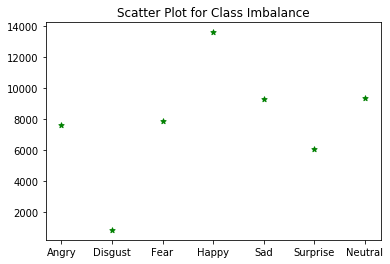

In [6]:
# Scatter Plot for Class Imbalance
plt.scatter(labels, count_emo, label= "stars", color= "green", marker= "*", s=30) 
plt.title('Scatter Plot for Class Imbalance')
plt.show

Train-Test Splitting

In [5]:
from keras.utils import to_categorical
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

Using TensorFlow backend.


CNN (2-layer)

In [9]:
model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(64,kernel_size=3,activation='relu', input_shape=(img_dim_m, img_dim_n,1)))
model.add(MaxPooling2D((2, 2)))

# 2nd Convlution Layer
model.add(Conv2D(128,kernel_size=5,activation='relu', ))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense
model.add(Flatten())
model.add(Dense(len(count_emo),activation='softmax'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=100,epochs=20)

score=model.evaluate(x_test,y_test,verbose=0)
print("Test Accuracy:",score[1]*100)

Train on 43677 samples, validate on 10920 samples
Epoch 1/20
43677/43677 [==============================] - 13s 300us/sample - loss: 0.3470 - acc: 0.8666 - val_loss: 0.3232 - val_acc: 0.8724
Epoch 2/20
43677/43677 [==============================] - 13s 293us/sample - loss: 0.3022 - acc: 0.8797 - val_loss: 0.2997 - val_acc: 0.8802
Epoch 3/20
43677/43677 [==============================] - 13s 293us/sample - loss: 0.2816 - acc: 0.8865 - val_loss: 0.2875 - val_acc: 0.8851
Epoch 4/20
43677/43677 [==============================] - 13s 289us/sample - loss: 0.2669 - acc: 0.8921 - val_loss: 0.2794 - val_acc: 0.8884
Epoch 5/20
43677/43677 [==============================] - 13s 291us/sample - loss: 0.2551 - acc: 0.8969 - val_loss: 0.2750 - val_acc: 0.8911
Epoch 6/20
43677/43677 [==============================] - 13s 292us/sample - loss: 0.2442 - acc: 0.9020 - val_loss: 0.2716 - val_acc: 0.8922
Epoch 7/20
43677/43677 [==============================] - 13s 289us/sample - loss: 0.2336 - acc: 0.9069 

In [10]:
print("Test Accuracy:",score[1]*100)


Test Accuracy: 90.39642810821533


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 72583     
Total params: 278,151
Trainable params: 278,151
Non-trainable params: 0
________________________________________________

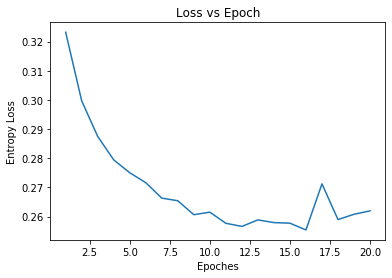

In [12]:
model.summary()
m_history=model.history.history

loss=m_history['val_loss']
epochs=[i+1 for i in range(20)]

plt.plot(epochs,loss)  
plt.xlabel('Epoches')
plt.ylabel('Entropy Loss')
plt.title("Loss vs Epoch")
plt.show()

In [19]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')                       
model_file.Upload()
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '13DM8WE7zV7O6Vs1Lh59Bk-m24vmTZNG0'})